In [21]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
dheart=pd.read_csv("C:/docs/Predictive/heart.csv")

In [23]:
dheart.head()

,age,sex,Chest Pain Type,Resting BP,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Max Heart rate achieved,Exercice induced angina,Depression induced by exercise,slope,ca,thal,target
0,57,1,2,150,126,1,1,173,0,0.2,0,0,1,1
1,57,1,0,130,131,0,1,115,1,1.2,0,0,2,1
2,44,0,2,108,141,0,1,175,0,0.6,2,0,2,1
3,71,0,0,112,149,0,1,125,0,1.6,2,0,2,1
4,49,1,2,118,149,0,0,126,0,0.8,2,0,2,1


In [26]:
from sklearn.preprocessing import StandardScaler

s_scal = StandardScaler()
col_to_scale = ['Resting BP', 'Serum Cholestrol', 'Max Heart rate achieved', 'Depression induced by exercise']
dheart[col_to_scale] = s_scal.fit_transform(dheart[col_to_scale])
dheart.head()

,age,sex,Chest Pain Type,Resting BP,Serum Cholestrol,Fasting Blood Sugar,Resting ECG,Max Heart rate achieved,Exercice induced angina,Depression induced by exercise,slope,ca,thal,target
0,0.290464,1,2,1.049520,-2.324160,1,1,1.021244,0,-0.724323,0,0,1,1
1,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,0,0,2,1
2,-1.143291,0,2,-1.349222,-2.034278,0,1,1.108705,0,-0.379244,2,0,2,1
3,1.834507,0,0,-1.120770,-1.879674,0,1,-1.077820,0,0.483451,2,0,2,1
4,-0.591847,1,2,-0.778093,-1.879674,0,0,-1.034089,0,-0.206705,2,0,2,1


In [28]:
#defining X and y variable
x = dheart[['age','sex','Chest Pain Type','Resting BP','Serum Cholestrol','Fasting Blood Sugar','Resting ECG',
            'Max Heart rate achieved','Depression induced by exercise','slope','ca','thal']]
y = dheart.iloc[::,-1]


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.30)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[37  7]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



Text(0, 0.5, 'Error Rate')

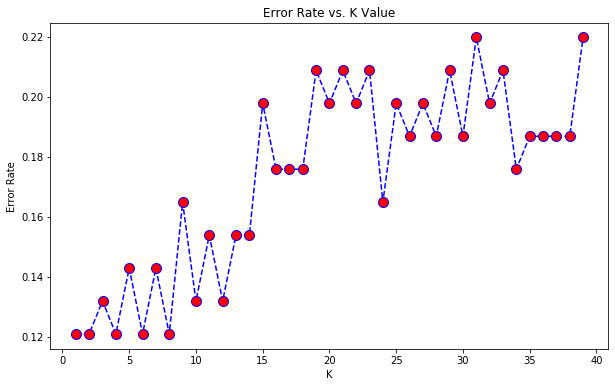

In [32]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[37  7]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.86      0.89      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
prediction=tree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))


[[43  1]
 [ 0 47]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.98      1.00      0.99        47

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



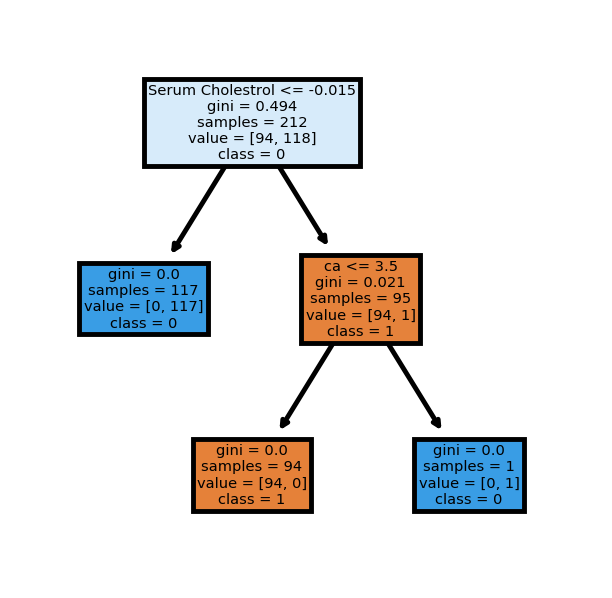

In [38]:
#Plotting the decision tree
from sklearn.tree.export import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt #Used for plotting graphs
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=350)
plot_tree(tree,
               feature_names = x.columns, 
               class_names=['1','0'],
               filled = True);


In [39]:
#Building random forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
score = forest.score(X_test,y_test)

print(forest.score(X_train,y_train))

print(score)

1.0
1.0


C:\Users\Poornima\Anaconda3_1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
rfc=forest.predict(X_test)
#Printing accuracy using confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc))
print("=== Classification Report ===")
print(classification_report(y_test, rfc))

=== Confusion Matrix ===
[[44  0]
 [ 0 47]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        47

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [43]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test,y_pred)
acc_gaussian

0.9230769230769231

In [44]:
#Printing accuracy using confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[41  3]
 [ 4 43]]
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.93      0.91      0.92        47

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

